In [55]:
# u -> varianza
# o -> desviación
tes = [1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1]

In [85]:
import random

# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS PYTHON RANDOM
def random_python(N=100):
    numeros = []
    random.seed(1032022)
    [numeros.append(random.random())for i in range(N)]
    return numeros

In [130]:
# FUNCIÓN GENERADORA 100 NÚMEROS PSEUDOALEATORIOS CUADRADOS MEDIOS
def cuadrados_medios(N,semilla,digitos):
    pseudoaleatorios = []
    xo = semilla
    xn = xo
    for i in range(N):
        xnn = xn ** 2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
        rn = ui / (int('9' * digitos) + 1)
        xn = ui
        pseudoaleatorios.append(rn)
    return pseudoaleatorios

In [87]:
# FUNCIÓN GEERADORA 100 NÚMEROS PSEUDOALEATORIOS CONGRUENCIA LINEAL
def congruencia_lineal(N, a, b, xo, m):
    pseudoaleatorios = []
    xn = xo
    for i in range(N):
        xnn = (a * xn + b) % m
        ui = xnn / m
        xn = xnn
        pseudoaleatorios.append(ui)
    return pseudoaleatorios

In [139]:
# FUNCIÓN GEERADORA 100 NÚMEROS PSEUDOALEATORIOS TAUSWORTH
def tauswoth(r, q, l, N):
  num = N * l
  binarios = []
  for i in range(0,num):
    if(i<q):
      binarios.append(1)
    else: 
      binarios.append((binarios[i-r]+binarios[i-q]) % 2)
  valor_l = l
  grup = int(num/valor_l)
  posicion = 0 
  aux = valor_l
  contador_1 = 0
  pseudoaleatorios = []
  for j in range(0,grup):
    new =binarios[contador_1:aux] 
    a_decimal = 0
    contador_12 = 0
    for k in range(len(new)-1,-1,-1):
      if(new[contador_12]==1): 
        a_decimal = 2**(k) + a_decimal
      contador_12 = contador_12 + 1
    pseudoaleatorios.append(a_decimal / (2**l))
    contador_1 = contador_1 + l
    aux = aux + l
  return pseudoaleatorios

In [7]:
def binario(aleatorios):
  aleatorios_binario = []
  for aleatorio in aleatorios:
    if aleatorio >= 0.5:
      aleatorios_binario.append(1)
    elif aleatorio < 0.5:
      aleatorios_binario.append(0)
  return aleatorios_binario

In [58]:
def get_Co(aleatorios_bin):
  cont_corridas = 1
  for i in range(len(aleatorios_bin)):
    if i < len(aleatorios_bin) - 1:
      if (aleatorios_bin[i] != aleatorios_bin[i+1]):
        cont_corridas += 1
  return cont_corridas

In [59]:
def get_n0(aleatorios_bin):
  count = 0
  for i in range(len(aleatorios_bin)):
    if aleatorios_bin[i] == 0:
      count += 1
  return count

In [60]:
def get_n1(aleatorios_bin):
  count = 0
  for i in range(len(aleatorios_bin)):
    if aleatorios_bin[i] == 1:
      count += 1
  return count

In [97]:
import math as mt

def corridas_medias(numeros):
  
  bin = binario(numeros)

  Co = get_Co(bin)
  n0 = get_n0(bin)
  n1 = get_n1(bin)
  n = n0 + n1
  
  varianza = ((2 * n0 * n1) / n) + 1/2
  desviacion = (2 * n0 * n1 * (2 * n0 * n1 - n)) / ((n ** 2) * (n - 1))
  z = (Co - varianza) / mt.sqrt(desviacion)

  resultados = {"C0": Co, "n0": n0, "n1": n1, "z": z}
  return resultados

In [81]:
def comprobacion_rango(z):
  superior = 1.960
  inferior = -1.960
  if (z >= inferior) and (z <= superior):
    print("Cumple, Dentro del Rango")
  else:
    print("No cumple, Fuera del Rango")

In [131]:
cuadrados_medios = corridas_medias(cuadrados_medios(100,74731897457,7))
print("Cuadrados medios")
print(cuadrados_medios)

Cuadrados medios
{'C0': 49, 'n0': 41, 'n1': 59, 'z': 0.024807833616163438}


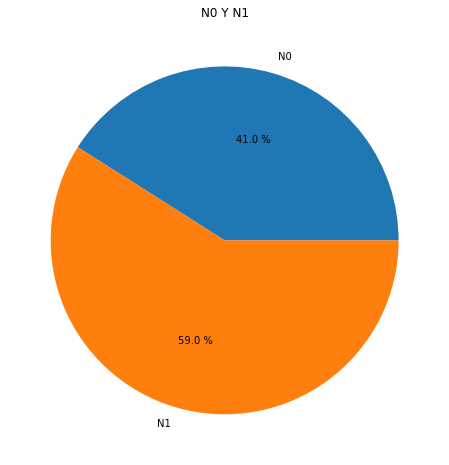

In [132]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

pesos = [cuadrados_medios["n0"], cuadrados_medios["n1"]]
categorias = ["N0","N1"]

normdata = colors.Normalize(min(pesos), max(pesos))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(pesos))

plt.title('N0 Y N1')
plt.pie(pesos, labels = categorias, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

In [133]:
congLineal = corridas_medias(congruencia_lineal(100, 74731897457, 37747318974, 7, 19))
print("Congruencia Lineal")
print(congLineal)

Congruencia Lineal
{'C0': 45, 'n0': 44, 'n1': 56, 'z': -0.970039114145979}


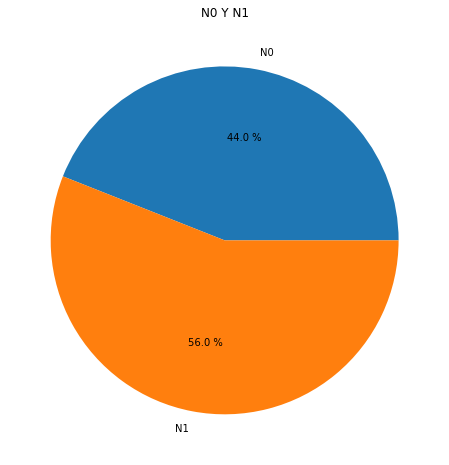

In [134]:
pesos = [congLineal["n0"], congLineal["n1"]]
categorias = ["N0","N1"]

normdata = colors.Normalize(min(pesos), max(pesos))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(pesos))

plt.title('N0 Y N1')
plt.pie(pesos, labels = categorias, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

In [135]:
python_ran = corridas_medias(random_python())
print("Python Random")
print(python_ran)

Python Random
{'C0': 46, 'n0': 57, 'n1': 43, 'z': -0.7181467695485956}


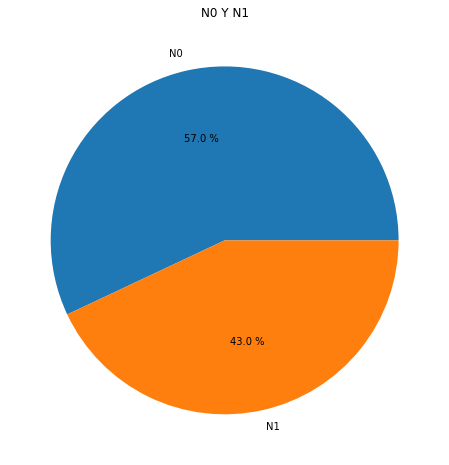

In [136]:
pesos = [python_ran["n0"], python_ran["n1"]]
categorias = ["N0","N1"]

normdata = colors.Normalize(min(pesos), max(pesos))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(pesos))

plt.title('N0 Y N1')
plt.pie(pesos, labels = categorias, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

In [137]:
tasw = corridas_medias(tauswoth(7, 15, 7, 100))
print("Tausworth")
print(tasw)

Tausworth
{'C0': 48, 'n0': 42, 'n1': 58, 'z': -0.25044374256329205}


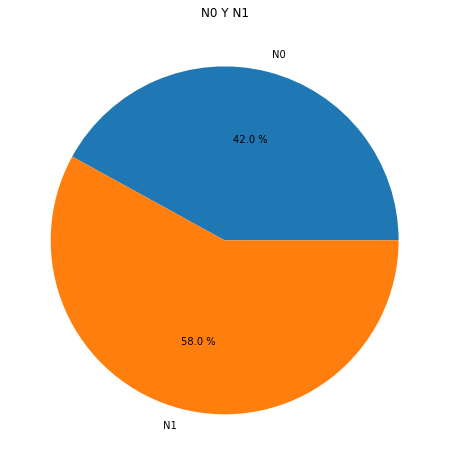

In [138]:
pesos = [tasw["n0"], tasw["n1"]]
categorias = ["N0","N1"]

normdata = colors.Normalize(min(pesos), max(pesos))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(pesos))

plt.title('N0 Y N1')
plt.pie(pesos, labels = categorias, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()